In [7]:
# KNN Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
zoo = pd.read_csv(r"C:\Users\shrad\Downloads\Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
X = zoo.drop(columns = ['animal name', 'type'])
y = zoo['type']

# Determining the best K

In [8]:
k = range(1,41)
kfold = KFold(10)
accuracy = []
for i in k:
    model = KNeighborsClassifier(i)
    result = cross_val_score(model, X, y, cv = kfold)
    accuracy.append(np.mean(result))
#accuracy

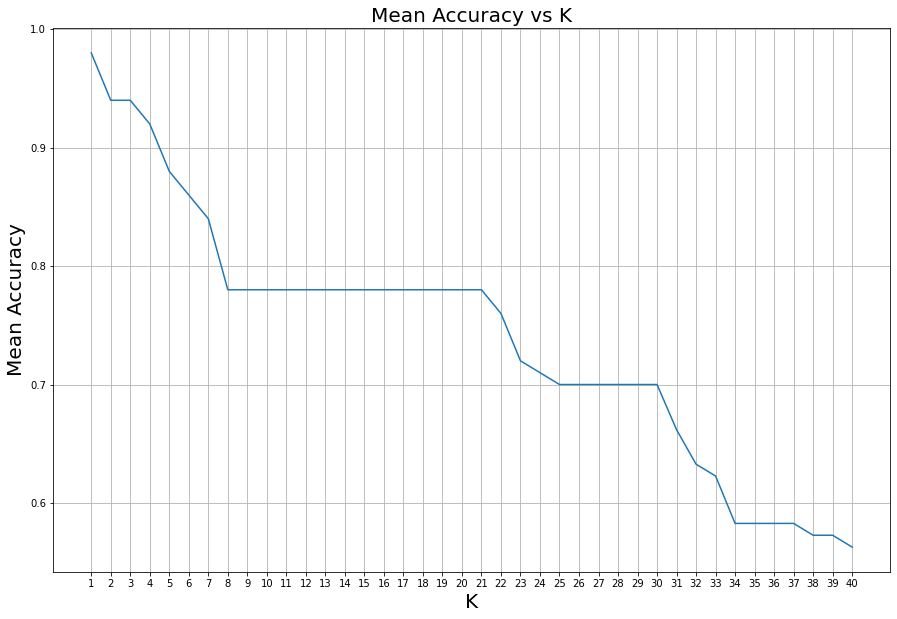

In [6]:
plt.figure(figsize = (15,10))
plt.plot(k, accuracy)
plt.xticks(k)
plt.xlabel('K', fontsize = 20)
plt.ylabel('Mean Accuracy', fontsize = 20)
plt.title('Mean Accuracy vs K', fontsize = 20)
plt.grid()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [10]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [11]:
np.mean(predictions == y_test)

1.0

In [12]:
cf_mat = confusion_matrix(y_test, predictions)
cf_mat

array([[13,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  2]], dtype=int64)

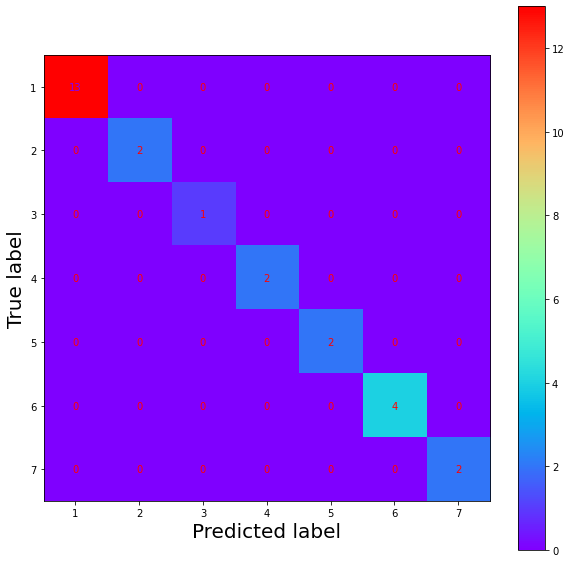

In [13]:
fig, ax = plt.subplots(figsize = (10,10))
plot_confusion_matrix(model, X_test, y_test, cmap = 'rainbow', ax = ax)
ax.set_xlabel('Predicted label', fontsize = 20)
ax.set_ylabel('True label', fontsize = 20)
plt.show()